In [1]:
import pandas as pd
import numpy as np

from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
df = pd.DataFrame(np.array([[7, 6.5, 9.2, 8.6, 8],
                           [7.5, 9.4, 7.3, 7, 7],
                           [7.6, 9.2, 8, 8, 7.5],
                           [5, 6.5, 6.5, 7, 9],
                           [6, 6, 7.8, 8.9, 7.3],
                           [7.8, 9.6, 7.7, 8, 6.5],
                           [6.3, 6.4, 8.2, 9, 7.2],
                           [7.9, 9.7, 7.5, 8, 6],
                           [6, 6, 6.5, 5.5, 8.7],
                           [6.8, 7.2, 8.7, 9, 7]]),
                 index = ['Lucia', 'Pedro', 'Ines', 'Luis', 'Andres', 'Ana', 'Carlos', 'Jose', 'Sonia', 'Maria'],
                 columns = ['Matematicas', 'Ciencias', 'Español', 'Historia', 'EdFidica'])
df

,Matematicas,Ciencias,Español,Historia,EdFidica
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
Maria,6.8,7.2,8.7,9.0,7.0


In [3]:
etiquetas = df.index
etiquetas

Index(['Lucia', 'Pedro', 'Ines', 'Luis', 'Andres', 'Ana', 'Carlos', 'Jose',
       'Sonia', 'Maria'],
      dtype='object')

# Reducción de dimensión por SVD

In [5]:
u, s, VT = svd(df)  # Obtencion de matrices cuyo producto arroja la matriz A
sigma = zeros((df.shape[0], df.shape[1]))   # Matriz de zeros de dimecion que A
sigma[:df.shape[1], :df.shape[1]] = diag(s)

# Reduccion a 2 dimensiones 

In [7]:
n_elements = 2 

UReduced2 = u[:, :n_elements]
print('U Reducida:')
print(UReduced2)

U Reducida:
[[-0.33090478 -0.29844247]
 [-0.32079813  0.35590965]
 [-0.33887152  0.21475231]
 [-0.28631997 -0.34779685]
 [-0.3037477  -0.3046643 ]
 [-0.33301138  0.39608249]
 [-0.31300374 -0.24404278]
 [-0.328788    0.47553197]
 [-0.27389698 -0.26452216]
 [-0.32638301 -0.10871076]]


In [8]:
sigmaReduced2 = sigma[:n_elements, :n_elements]
print('Matriz Sigma Reducida:')
print(sigmaReduced2)

Matriz Sigma Reducida:
[[53.21335049  0.        ]
 [ 0.          5.35631448]]


In [9]:
VTReduced2 = VT[:n_elements, :]
print("VT Reducida:")
print(VTReduced2)

VT Reducida:
[[-0.40556463 -0.45759727 -0.46123811 -0.47103299 -0.43761787]
 [ 0.30388113  0.70497323 -0.20845983 -0.2165757  -0.56595801]]


In [10]:
AReduced2 = UReduced2.dot(sigmaReduced2.dot(VTReduced2))
print("Matriz A tranformada:")
print(AReduced2)

Matriz A tranformada:
[[6.65563617 6.93068907 8.45496902 8.64041633 8.61053016]
 [7.50259774 9.15546106 7.47627701 7.62801112 6.39154032]
 [7.66288835 9.06253486 8.0774837  8.24477427 7.24032869]
 [5.61309793 5.65867129 7.41578628 7.58014066 7.72189396]
 [6.05941975 6.24591247 7.7953721  7.96693512 7.99698132]
 [7.83156613 9.60455223 7.73118336 7.88753689 6.55416982]
 [6.35785122 6.70021013 7.95486409 8.12861624 8.02875678]
 [7.86973795 9.80171752 7.53881312 7.68951159 6.21497236]
 [5.48053658 5.67061811 7.01789357 7.17215282 7.18015541]
 [6.86687283 7.53702066 8.13213661 8.30697925 7.93006916]]


In [11]:
T2 = UReduced2.dot(sigmaReduced2)
print('Matriz T(2 Dimenciones):')
print(T2)

Matriz T(2 Dimenciones):
[[-17.60855193  -1.59855173]
 [-17.07074326   1.90636402]
 [-18.03248887   1.15028089]
 [-15.23604486  -1.86290932]
 [-16.1634327   -1.6318778 ]
 [-17.7206514    2.12154237]
 [-16.65597775  -1.30716988]
 [-17.49591103   2.54709878]
 [-14.57497601  -1.41686385]
 [-17.36793336  -0.58228904]]


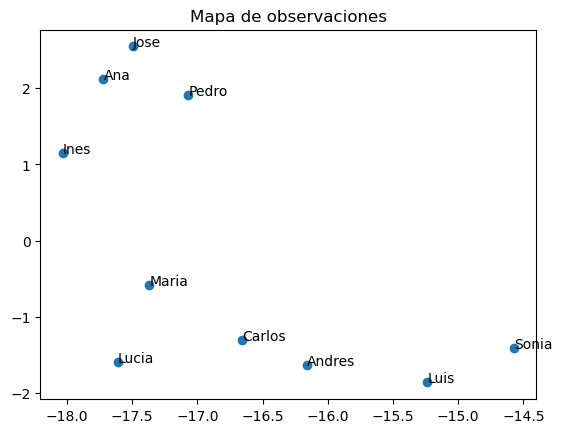

In [12]:
df = pd.DataFrame(T2, columns = ['a', 'b'])
x = df.iloc[:, 0]
y = df.iloc[:, 1]
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title('Mapa de observaciones')
ax.scatter(x, y)

for i, txt in enumerate(etiquetas):
    ax.annotate(txt, (x[i], y[i]))

# Reduccion a 3 dimensiones 

In [14]:
n_elements = 3

UReduced3 = u[:, :n_elements]

sigmaReduced3 = sigma[:n_elements, :n_elements]

VTReduced3 = VT[:n_elements, :]

AReduced3 = UReduced3.dot(sigmaReduced3.dot(VTReduced3))
print("Matriz A tranformada:")
print(AReduced3)

Matriz A tranformada:
[[6.65245886 6.72762726 8.69042319 9.08512051 8.09898421]
 [7.50649243 9.40437093 7.1876611  7.08289996 7.01858503]
 [7.66453175 9.1675645  7.95569976 8.01475998 7.50491554]
 [5.6205042  6.13200674 6.8669445  6.54353881 8.91430342]
 [6.05471948 5.94551744 8.14368606 8.62479847 7.24023707]
 [7.83115817 9.57847935 7.76141538 7.94463634 6.48848799]
 [6.35253602 6.36051578 8.34874639 8.87254488 7.17301112]
 [7.86825556 9.7069775  7.64866605 7.89699168 5.97630674]
 [5.49031524 6.29557293 6.29324613 5.80350542 8.75451889]
 [6.86123771 7.17687926 8.54972766 9.09568679 7.02281405]]


In [15]:
T3 = UReduced3.dot(sigmaReduced3)
print('Matriz T(3 Dimenciones):')
print(T3)

Matriz T(3 Dimenciones):
[[-17.60855193  -1.59855173   0.74573717]
 [-17.07074326   1.90636402  -0.91411251]
 [-18.03248887   1.15028089  -0.38571754]
 [-15.23604486  -1.86290932  -1.73830731]
 [-16.1634327   -1.6318778    1.10318989]
 [-17.7206514    2.12154237   0.09575169]
 [-16.65597775  -1.30716988   1.24751522]
 [-17.49591103   2.54709878   0.34792931]
 [-14.57497601  -1.41686385  -2.29512399]
 [-17.36793336  -0.58228904   1.32260625]]


Text(0.5, 0.92, 'Datos en 3 dimenciones')

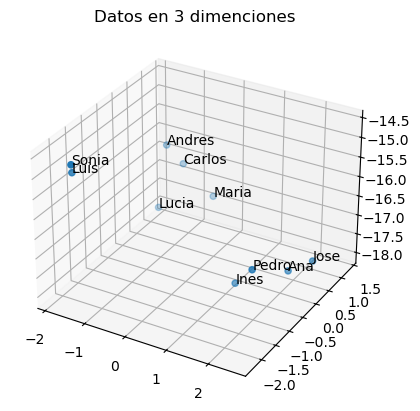

In [16]:
from mpl_toolkits.mplot3d import Axes3D
df3 = pd.DataFrame(T3, columns = ['a', 'b', 'c'])

ax3d = plt.figure().add_subplot(projection = '3d')

arrayx = np.array(df3['b'])
arrayy = np.array(df3['c'])
arrayz = np.array(df3['a'])

ax3d.scatter(arrayx, arrayy, arrayz)

for x, y, z, label in zip(arrayx, arrayy, arrayz, etiquetas):
    ax3d.text(x, y, z, label)
plt.title("Datos en 3 dimenciones")